In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE

In [9]:
df = pd.read_csv('/Volumes/GoogleDrive-116698033185964814580/My Drive/Socialz/cobol_pullrequests.csv')
df

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files
0,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:38:18 UTC,"{""action"":""closed"",""number"":3,""pull_request"":{...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1
1,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:28:12 UTC,"{""action"":""opened"",""number"":3,""pull_request"":{...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1
2,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 16:19:54 UTC,"{""action"":""closed"",""number"":4,""pull_request"":{...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1
3,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:37:56 UTC,"{""action"":""opened"",""number"":4,""pull_request"":{...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1
4,PullRequestEvent,mavimaec,vimaec/g3d,2021-11-19 20:40:52 UTC,"{""action"":""closed"",""number"":8,""pull_request"":{...","""COBOL""","""closed""","""mavimaec""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/8""",2,113,702,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-05-14 03:43:29 UTC,"{""action"":""closed"",""number"":115,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,688,1,39
1329,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-06 17:56:00 UTC,"{""action"":""closed"",""number"":127,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15
1330,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-11-30 22:12:33 UTC,"{""action"":""opened"",""number"":127,""pull_request""...","""COBOL""","""opened""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15
1331,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-09 04:01:35 UTC,"{""action"":""closed"",""number"":128,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,5,1,1


In [6]:
len(df['login'].unique())

145

In [10]:
def text_lenght(text):

    if text == None:

        return 0
    else:

        return len(text)

df['payload'] = df['payload'].apply(json.loads)
df['merged'] = df['payload'].apply(lambda x: x.get('pull_request').get('merged'))
df['comments'] = df['payload'].apply(lambda x: x.get('pull_request').get('comments'))
df['review_comments'] = df['payload'].apply(lambda x: x.get('pull_request').get('review_comments'))
df['title lenght'] = df['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('title')))
df['body lenght'] = df['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('body')))
#df['total LOC'] = df['additions'] + df['deletions']

df

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght
0,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:38:18 UTC,"{'action': 'closed', 'number': 3, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1,False,0,0,15,0
1,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:28:12 UTC,"{'action': 'opened', 'number': 3, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1,False,0,0,15,0
2,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 16:19:54 UTC,"{'action': 'closed', 'number': 4, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1,True,0,0,12,83
3,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:37:56 UTC,"{'action': 'opened', 'number': 4, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1,False,0,0,12,83
4,PullRequestEvent,mavimaec,vimaec/g3d,2021-11-19 20:40:52 UTC,"{'action': 'closed', 'number': 8, 'pull_reques...","""COBOL""","""closed""","""mavimaec""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/8""",2,113,702,16,True,0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-05-14 03:43:29 UTC,"{'action': 'closed', 'number': 115, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,688,1,39,True,0,0,75,155
1329,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-06 17:56:00 UTC,"{'action': 'closed', 'number': 127, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15,True,0,1,65,114
1330,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-11-30 22:12:33 UTC,"{'action': 'opened', 'number': 127, 'pull_requ...","""COBOL""","""opened""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15,False,0,0,65,0
1331,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-09 04:01:35 UTC,"{'action': 'closed', 'number': 128, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,5,1,1,True,0,0,52,1092


In [40]:
df['created_at_time'] = round(  pd.to_datetime(df['created_at'],format= '%Y-%m-%d %H:%M:%S %Z').dt.hour + \
                                pd.to_datetime(df['created_at'],format= '%Y-%m-%d %H:%M:%S %Z').dt.minute / 60 + \
                                pd.to_datetime(df['created_at'],format= '%Y-%m-%d %H:%M:%S %Z').dt.second / 3600, 1)

df['created_at_day_of_week'] = pd.to_datetime(df['created_at'],format= '%Y-%m-%d %H:%M:%S %Z').dt.day_of_week

df

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,...,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght,created_at_time,created_at_day_of_week
0,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:38:18 UTC,"{'action': 'closed', 'number': 3, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",...,2,2,1,False,0,0,15,0,15.6,2
1,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:28:12 UTC,"{'action': 'opened', 'number': 3, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",...,2,2,1,False,0,0,15,0,15.5,2
2,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 16:19:54 UTC,"{'action': 'closed', 'number': 4, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",...,23,11,1,True,0,0,12,83,16.3,2
3,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:37:56 UTC,"{'action': 'opened', 'number': 4, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",...,23,11,1,False,0,0,12,83,15.6,2
4,PullRequestEvent,mavimaec,vimaec/g3d,2021-11-19 20:40:52 UTC,"{'action': 'closed', 'number': 8, 'pull_reques...","""COBOL""","""closed""","""mavimaec""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/8""",...,113,702,16,True,0,0,15,0,20.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-05-14 03:43:29 UTC,"{'action': 'closed', 'number': 115, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",...,688,1,39,True,0,0,75,155,3.7,4
1329,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-06 17:56:00 UTC,"{'action': 'closed', 'number': 127, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",...,506,0,15,True,0,1,65,114,17.9,0
1330,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-11-30 22:12:33 UTC,"{'action': 'opened', 'number': 127, 'pull_requ...","""COBOL""","""opened""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",...,506,0,15,False,0,0,65,0,22.2,1
1331,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-09 04:01:35 UTC,"{'action': 'closed', 'number': 128, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",...,5,1,1,True,0,0,52,1092,4.0,3


In [46]:
columns = ['created_at_time','created_at_day_of_week']
df = df[columns]
df

,created_at_time,created_at_day_of_week
0,15.6,2
1,15.5,2
2,16.3,2
3,15.6,2
4,20.7,4
...,...,...
1328,3.7,4
1329,17.9,0
1330,22.2,1
1331,4.0,3


In [47]:
clf = IsolationForest(max_samples='auto', n_jobs=-1, random_state=42)
df['pred'] = clf.fit_predict(df)

/var/folders/3k/tk51r55962751zt89q_rcgfw0000gn/T/ipykernel_3499/3538438481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = clf.fit_predict(df)


In [48]:
df

,created_at_time,created_at_day_of_week,pred
0,15.6,2,1
1,15.5,2,1
2,16.3,2,1
3,15.6,2,1
4,20.7,4,-1
...,...,...,...
1328,3.7,4,-1
1329,17.9,0,-1
1330,22.2,1,-1
1331,4.0,3,-1


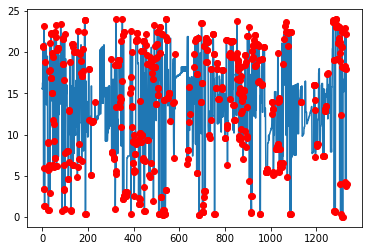

In [53]:
markers_on = df[df['pred'] == -1].index.to_list()
plt.plot(df['created_at_time'])
plt.plot(df['created_at_time'], 'ro', markevery=markers_on)

In [55]:
# Test commits created between monday (0) to friday (4) betwenn 9:30 am (9.5) and 17:00 hrs + outlier commit at Sunday (6) 1 am (1)

test = {'created_at_time':[9.5,10,10.5,11,12,13,14,15,16,17,9.5,10,10.5,11,12,13,14,15,16,17,9.5,10,10.5,11,12,13,14,15,16,17,9.5,10,10.5,11,12,13,14,15,16,17,9.5,10,10.5,11,12,13,14,15,16,17,1], 
        'created_at_day_of_week':[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,6]}

test = pd.DataFrame(test)

clf = IsolationForest(max_samples='auto', n_jobs=-1, random_state=42)
test['pred'] = clf.fit_predict(test)
test

,created_at_time,created_at_day_of_week,pred
0,9.5,0,-1
1,10.0,0,-1
2,10.5,0,-1
3,11.0,0,-1
4,12.0,0,-1
5,13.0,0,-1
6,14.0,0,-1
7,15.0,0,-1
8,16.0,0,-1
9,17.0,0,-1
